## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [291]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import six
import sys
sys.modules['sklearn.externals.six'] = six
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from sklearn.utils import _safe_indexing
sys.modules['sklearn.utils.safe_indexing'] = sklearn.utils._safe_indexing
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [2]:
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [6]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [7]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
df['account length'].value_counts()

105    43
87     42
93     40
101    40
90     39
       ..
191     1
199     1
215     1
221     1
2       1
Name: account length, Length: 212, dtype: int64

In [9]:
df['number vmail messages'].value_counts()

0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
35      32
22      32
39      30
37      29
34      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
41      13
16      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
8        2
48       2
50       2
9        2
11       2
49       1
10       1
4        1
51       1
Name: number vmail messages, dtype: int64

In [10]:
df['customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer service calls, dtype: int64

In [11]:
df.drop(columns=['phone number'], inplace=True)

In [12]:
df.replace(False, 0, inplace=True)
df.replace(True, 1, inplace=True)
df.replace('no', 0, inplace=True)
df.replace('yes', 1, inplace=True)

In [13]:
one_hot_df = pd.get_dummies(df, drop_first=True)

In [14]:
one_hot_df.columns

Index(['account length', 'area code', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn', 'state_AL',
       'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC',
       'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID',
       'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
       'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS',
       'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ',
       'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR',
       'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX',
       'stat

In [15]:
one_hot_no_states = one_hot_df[['account length', 'area code', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn']]

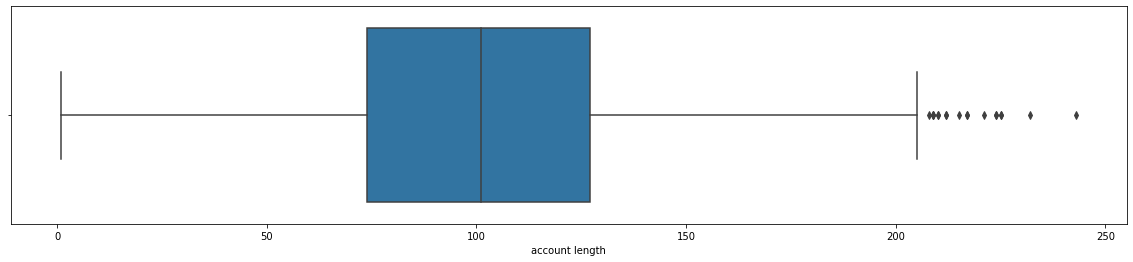

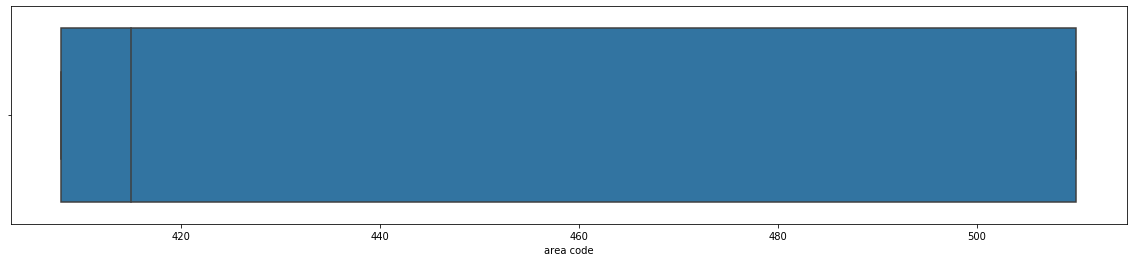

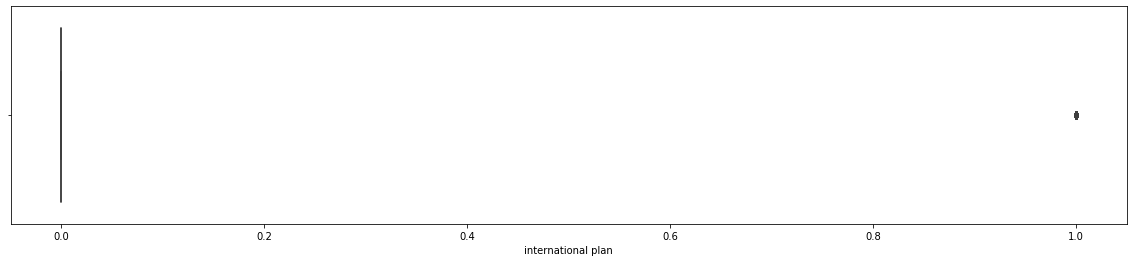

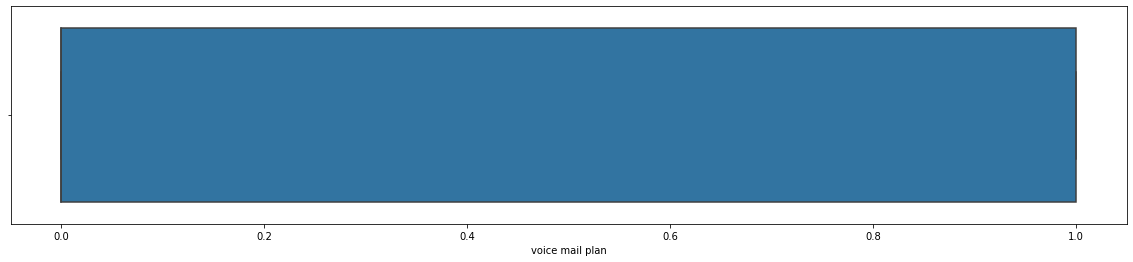

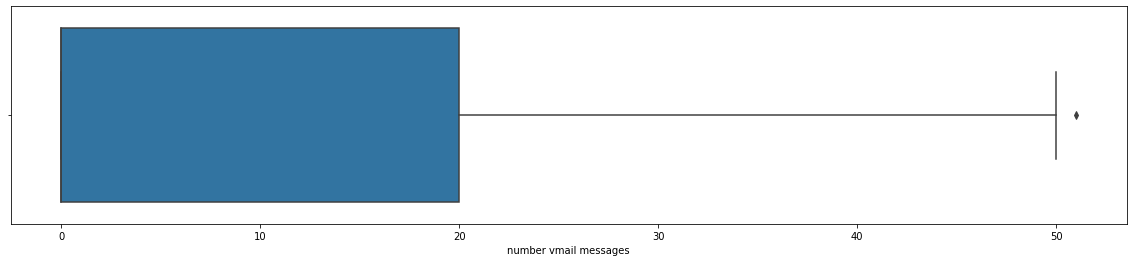

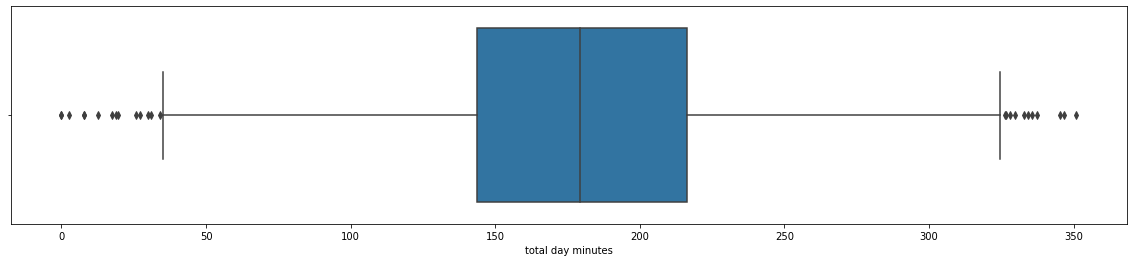

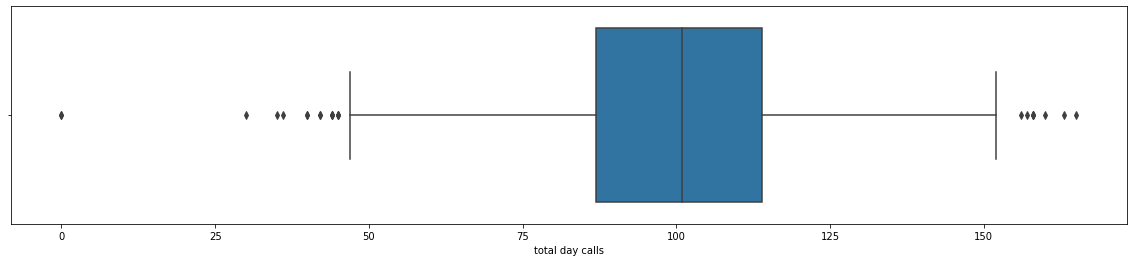

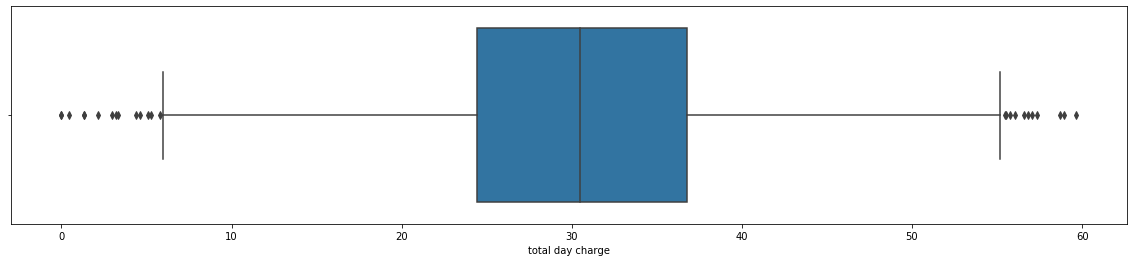

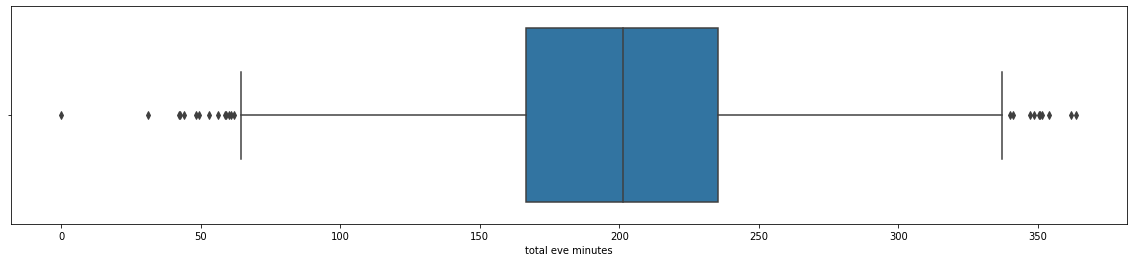

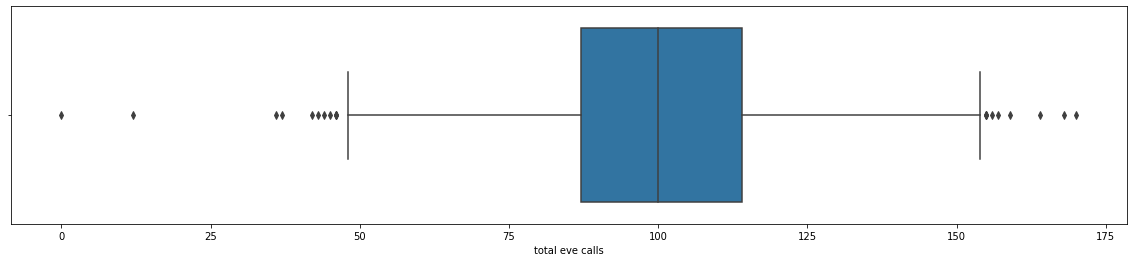

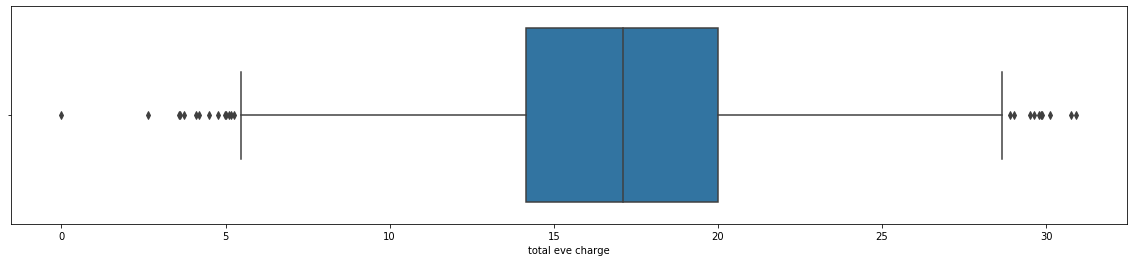

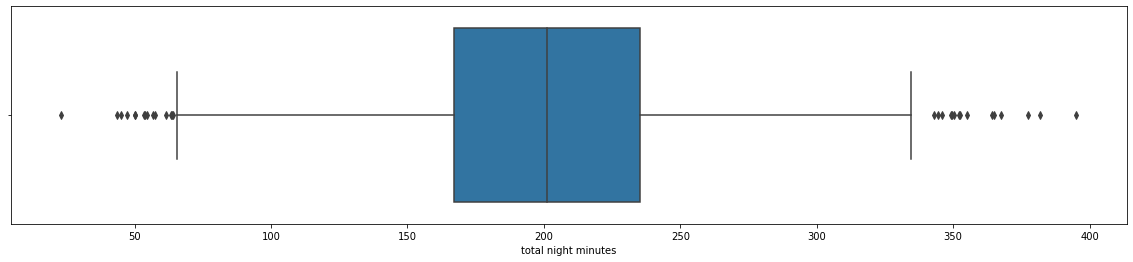

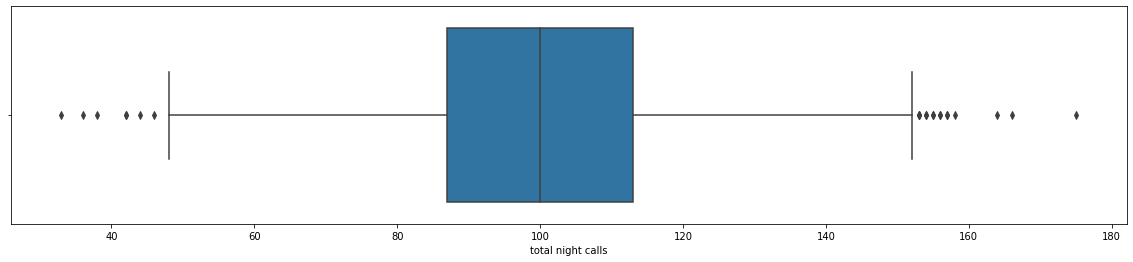

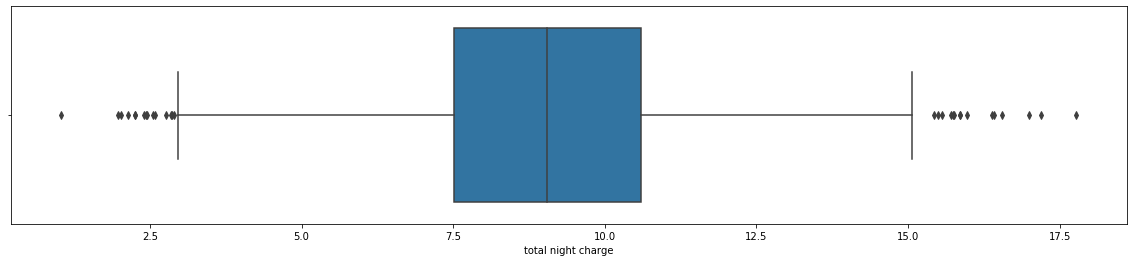

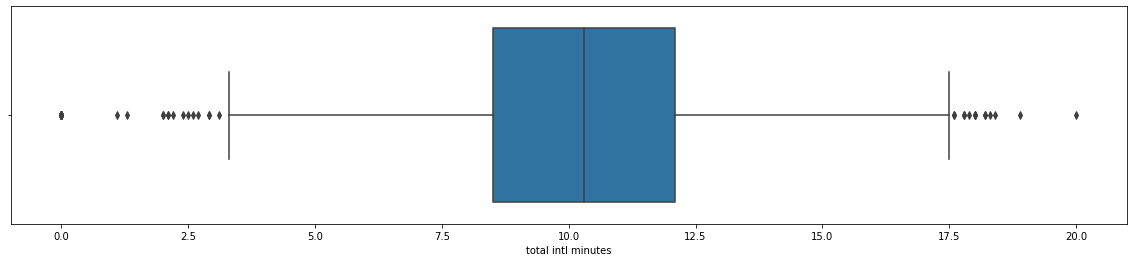

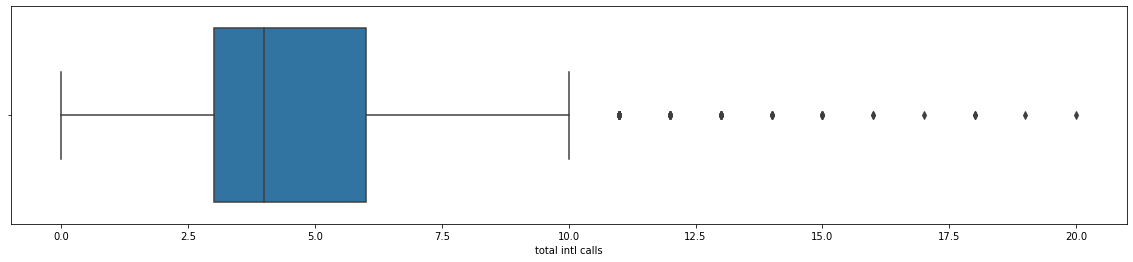

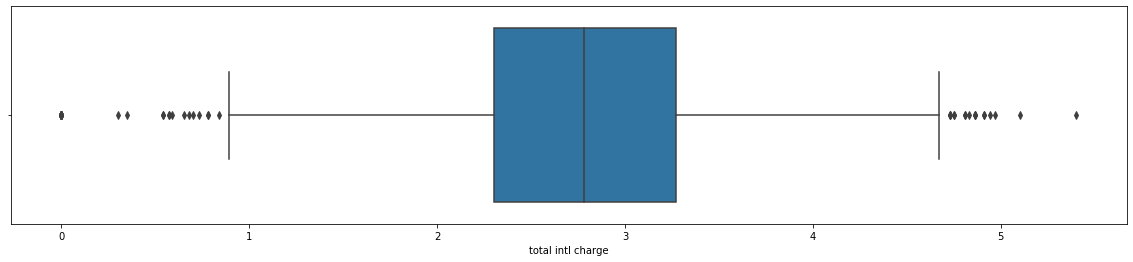

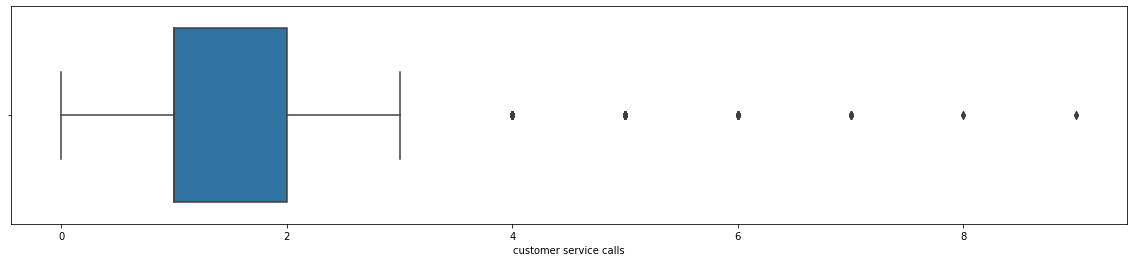

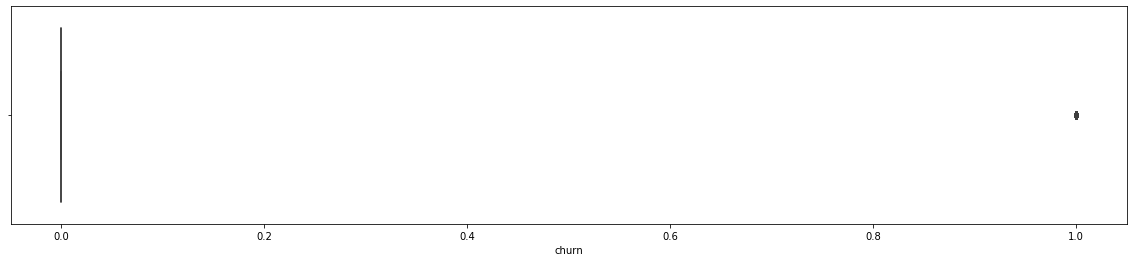

In [16]:
for column in one_hot_no_states.columns:
    plt.figure(figsize=(20,4))
    plt.rcParams.update({'figure.max_open_warning': 0})
    sns.boxplot(x=df[column])

In [17]:
one_hot_df.columns

Index(['account length', 'area code', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn', 'state_AL',
       'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC',
       'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID',
       'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
       'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS',
       'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ',
       'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR',
       'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX',
       'stat

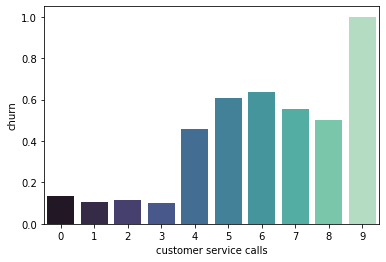

In [18]:
sns.barplot(x='customer service calls', y='churn',
                    data=df, palette='mako', ci=None)

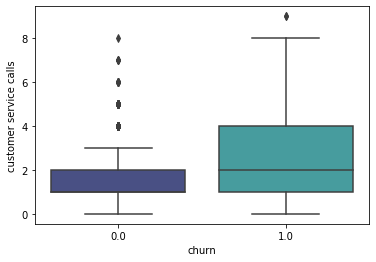

In [19]:
sns.boxplot(x='churn', y='customer service calls',
              data=df, palette='mako')

In [20]:
churn_rate = sum(df['churn']) / len(df['churn'])
churn_rate

0.14491449144914492

In [21]:
df['total_minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes']
df['total_calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls']

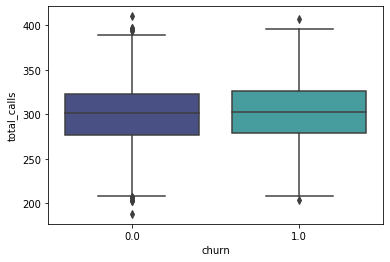

In [22]:
sns.boxplot(x='churn', y='total_calls',
              data=df, palette='mako')

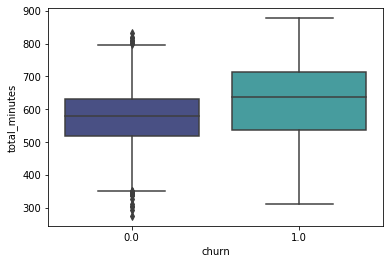

In [23]:
sns.boxplot(x='churn', y='total_minutes',
              data=df, palette='mako')

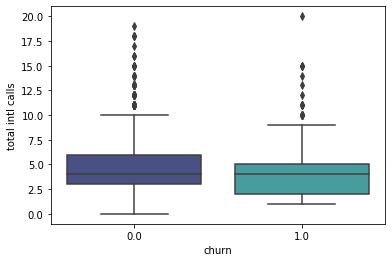

In [24]:
sns.boxplot(x='churn', y='total intl calls',
              data=df, palette='mako')

In [25]:
charges = ['total day charge', 'total eve charge', 'total night charge', 'total intl charge']
calls = ['total day calls', 'total eve calls', 'total night calls', 'total intl calls']
for charge, call in zip(charges, calls):
    print((df[charge] / df[call]).median())

0.3044545454545455
0.1687546152710087
0.0902803738317757
0.6639999999999999


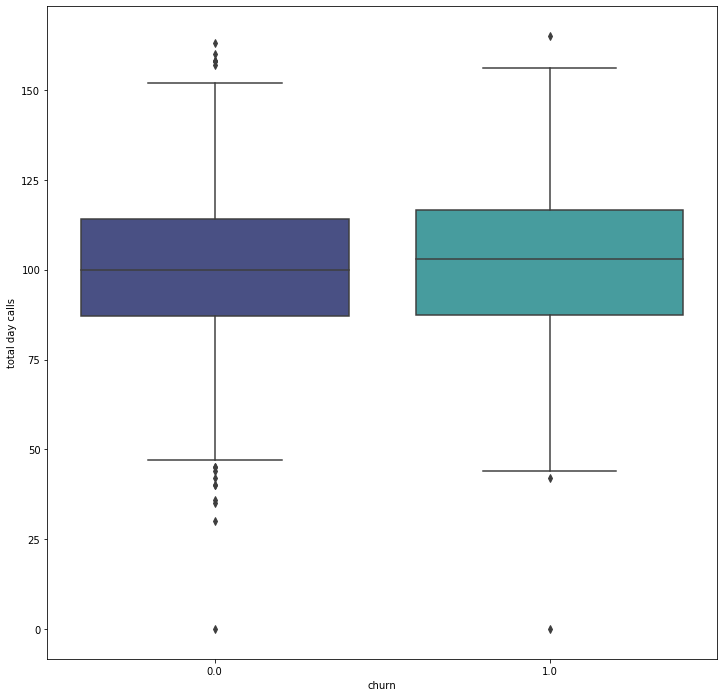

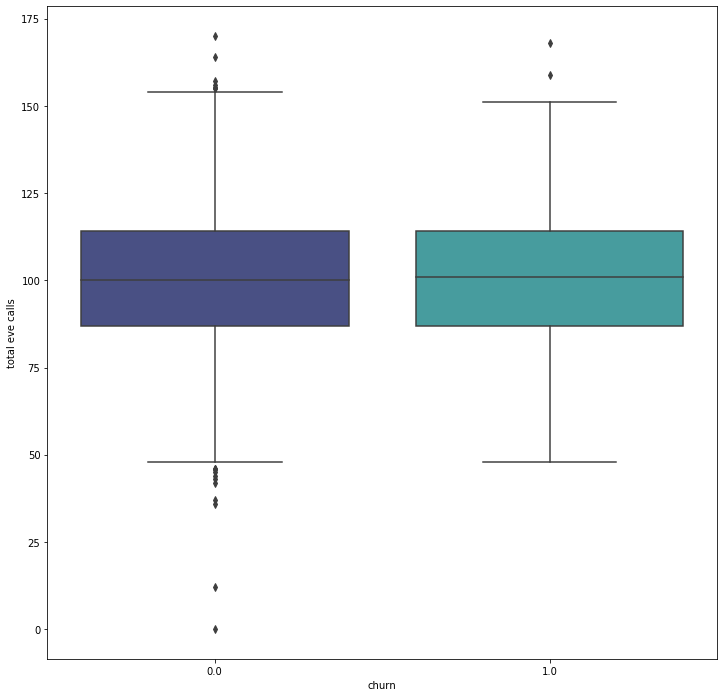

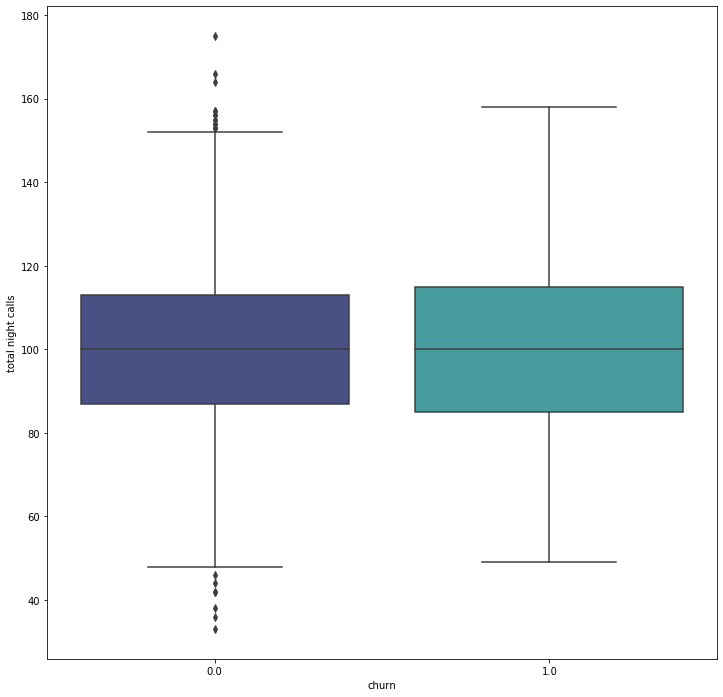

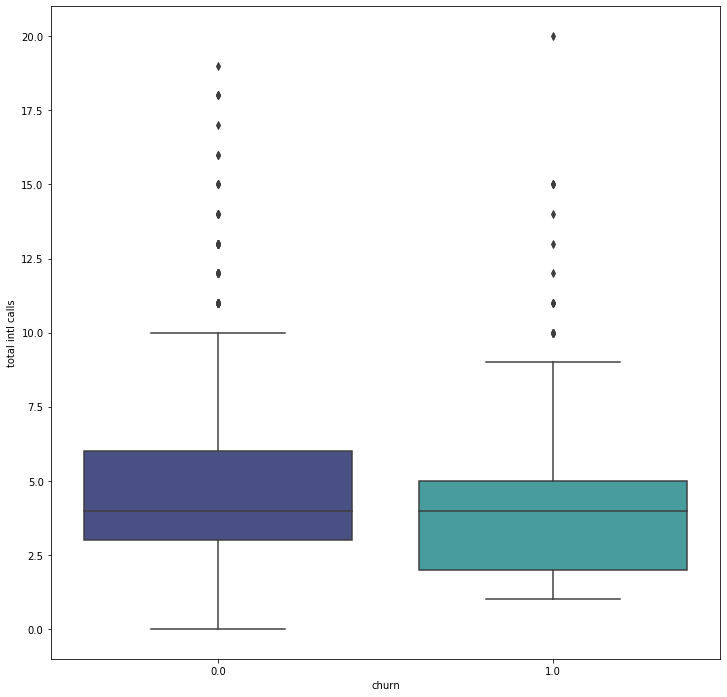

In [26]:
for call in calls:
    plt.figure(figsize=(12,12))
    sns.boxplot(x='churn', y=call,
              data=df, palette='mako')

In [28]:
state_churn = df.groupby('state')['churn'].value_counts(normalize=True)
state_churn = pd.DataFrame(state_churn)
state_churn.columns = ['amount']
state_churn = state_churn.reset_index()

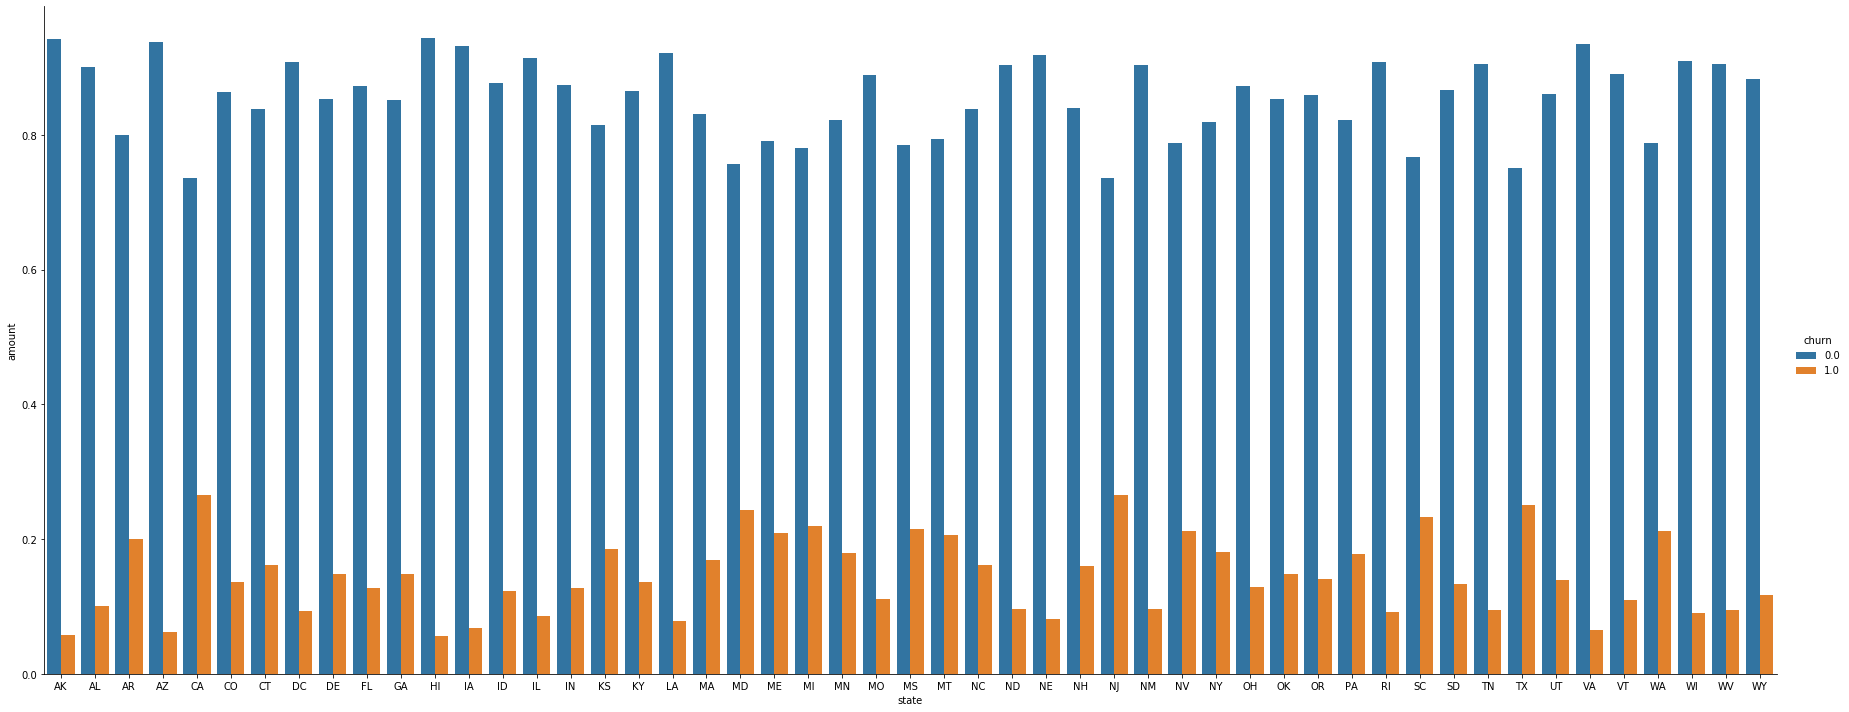

In [29]:
sns.catplot(data=state_churn, kind='bar', x='state', y='amount', hue='churn', aspect=2.5, height=10)

In [118]:
one_hot_df = one_hot_df.drop(columns=['area code', 'total day minutes', 'total eve minutes', 
                         'total night minutes', 'total intl minutes'])

## Logistic Regression

In [120]:
X = one_hot_df.drop(columns=['churn'])
y = one_hot_df.churn

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [122]:
logreg = LogisticRegression(fit_intercept=False, solver='liblinear')
model_log = logreg.fit(X_train, y_train)

In [123]:
y_hat_test = logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_hat_test)
cnf_matrix

array([[549,  17],
       [ 88,  13]])

In [124]:
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [125]:
print(precision_score(y_train, y_hat_train))
print(precision_score(y_test, y_hat_test))
print(recall_score(y_train, y_hat_train))
print(recall_score(y_test, y_hat_test))
print(accuracy_score(y_train, y_hat_train))
print(accuracy_score(y_test, y_hat_test))
print(f1_score(y_train, y_hat_train))
print(f1_score(y_test, y_hat_test))

0.6328125
0.43333333333333335
0.21204188481675393
0.12871287128712872
0.8694673668417104
0.8425787106446777
0.31764705882352945
0.1984732824427481


In [126]:
training_precision = []
testing_precision = []
training_recall = []
testing_recall = []
training_accuracy = []
testing_accuracy = []
training_f1 = []
testing_f1 = []

for i in range(10, 95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100) # replace the "None" here
    logreg = LogisticRegression(fit_intercept=False, C=1e20, solver='liblinear')
    model_log = logreg.fit(X_train, y_train)
    y_hat_test = logreg.predict(X_test)
    y_hat_train = logreg.predict(X_train) 
    training_precision.append(precision_score(y_train, y_hat_train))
    testing_precision.append(precision_score(y_test, y_hat_test))
    training_recall.append(recall_score(y_train, y_hat_train))
    testing_recall.append(recall_score(y_test, y_hat_test))
    training_accuracy.append(accuracy_score(y_train, y_hat_train))
    testing_accuracy.append(accuracy_score(y_test, y_hat_test))
    training_f1.append(f1_score(y_train, y_hat_train))
    testing_f1.append(f1_score(y_test, y_hat_test))

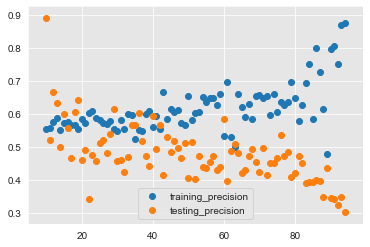

In [127]:
plt.scatter(list(range(10, 95)), training_precision, label='training_precision')
plt.scatter(list(range(10, 95)), testing_precision, label='testing_precision')
plt.legend()
plt.show()

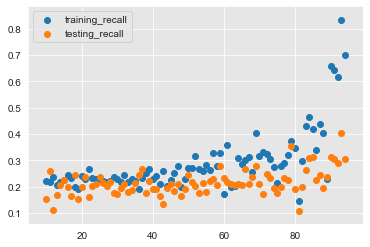

In [128]:
plt.scatter(list(range(10, 95)), training_recall, label='training_recall')
plt.scatter(list(range(10, 95)), testing_recall, label='testing_recall')
plt.legend()
plt.show()

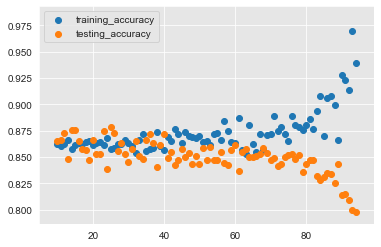

In [129]:
plt.scatter(list(range(10, 95)), training_accuracy, label='training_accuracy')
plt.scatter(list(range(10, 95)), testing_accuracy, label='testing_accuracy')
plt.legend()
plt.show()

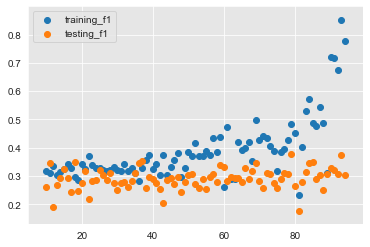

In [130]:
plt.scatter(list(range(10, 95)), training_f1, label='training_f1')
plt.scatter(list(range(10, 95)), testing_f1, label='testing_f1')
plt.legend()
plt.show()

In [131]:
# Calculate the probability scores of each point in the training set
y_train_score = model_log.decision_function(X_train)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

# Calculate the probability scores of each point in the test set
y_test_score = model_log.decision_function(X_test)

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr, test_tpr, thresholds = roc_curve(y_test, y_test_score)

AUC: 0.9568047337278107


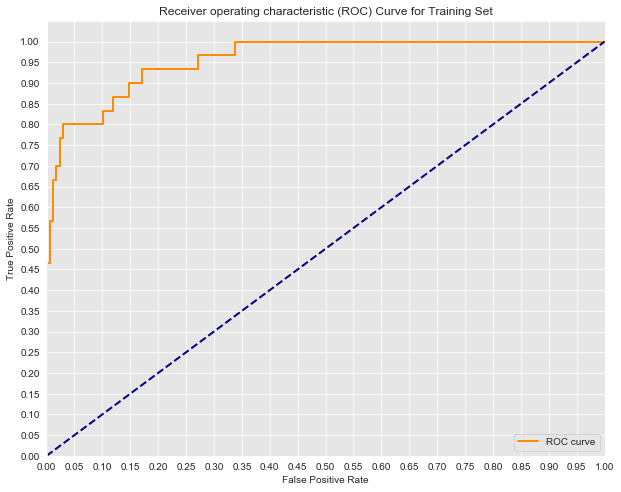

In [132]:
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# ROC curve for training set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(train_fpr, train_tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('AUC: {}'.format(auc(train_fpr, train_tpr)))
plt.show()

AUC: 0.6429925903236988


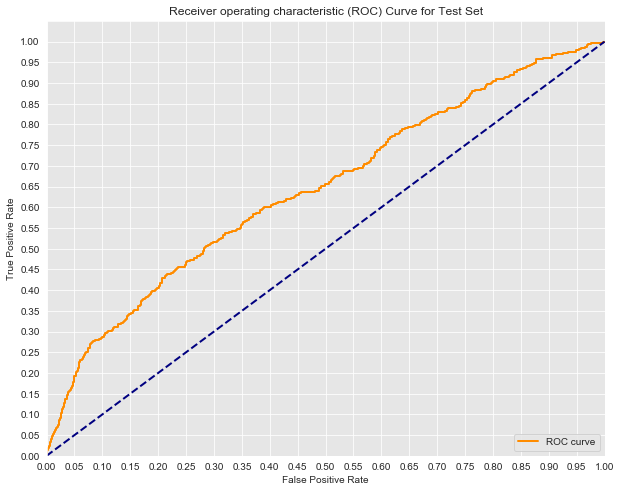

In [133]:
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc='lower right')
print('AUC: {}'.format(auc(test_fpr, test_tpr)))
plt.show()

## K-Nearest Neighbors

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [135]:
scaler = StandardScaler()

In [136]:
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

In [137]:
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X.columns)
scaled_df_train.head()

,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,3.601382,-0.326624,-0.611162,-0.584936,-0.429657,-1.547170,-1.840891,-0.731087,0.925634,1.256197,...,-0.141042,-0.129542,-0.150437,6.705633,-0.154303,-0.145137,-0.147809,-0.161784,-0.180369,-0.153025
1,0.184951,-0.326624,-0.611162,-0.584936,0.224176,-1.244071,0.499864,-0.139179,-0.353704,0.164841,...,-0.141042,-0.129542,-0.150437,-0.149128,-0.154303,-0.145137,-0.147809,-0.161784,-0.180369,-0.153025
2,-0.650176,3.061624,-0.611162,-0.584936,-1.133785,0.787772,0.549667,2.493068,0.209205,0.147309,...,-0.141042,-0.129542,6.647288,-0.149128,-0.154303,-0.145137,-0.147809,-0.161784,-0.180369,-0.153025
3,1.020079,-0.326624,-0.611162,-0.584936,-0.127888,-0.970200,-1.890695,-0.408439,1.437368,-1.176344,...,-0.141042,-0.129542,-0.150437,-0.149128,-0.154303,-0.145137,-0.147809,-0.161784,-0.180369,-0.153025
4,-0.371801,-0.326624,-0.611162,-0.584936,-0.228477,0.675192,-1.143645,1.295326,0.516246,0.265649,...,-0.141042,-0.129542,-0.150437,-0.149128,-0.154303,-0.145137,-0.147809,-0.161784,-0.180369,-0.153025


In [138]:
clf = KNeighborsClassifier()
clf.fit(scaled_data_train, y_train)
test_preds = clf.predict(scaled_data_test)

In [139]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.36363636363636365
Recall Score: 0.039603960396039604
Accuracy Score: 0.8440779610194903
F1 Score: 0.07142857142857144


In [140]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        recall = recall_score(y_test, preds)
        if recall > best_score:
            best_k = k
            best_score = recall
    
    print("Best Value for k: {}".format(best_k))
    print("Recall: {}".format(best_score))

In [141]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)

Best Value for k: 1
Recall: 0.19801980198019803


In [142]:
#Without scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [143]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
test_preds = clf.predict(X_test)

In [144]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.8
Recall Score: 0.1188118811881188
Accuracy Score: 0.8620689655172413
F1 Score: 0.20689655172413793


In [145]:
find_best_k(X_train, y_train, X_test, y_test)

Best Value for k: 1
Recall: 0.22772277227722773


In [146]:
#In anticipation of Decision tree, using DecisionTreeClassifier
SEED = 1
dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [147]:
y_pred = dt.predict(X_test)

In [148]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.849202323059161

In [149]:
recall_score(y_test, y_pred)

0.7425742574257426

## Let's try again using SMOTE


In [154]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)

In [156]:
logreg = LogisticRegression(fit_intercept=False, solver='liblinear')
model_log = logreg.fit(X_train_resampled, y_train_resampled)

In [157]:
y_hat_test = logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_hat_test)
cnf_matrix

array([[427, 139],
       [ 34,  67]])

In [158]:
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [159]:
print(precision_score(y_train, y_hat_train))
print(precision_score(y_test, y_hat_test))
print(recall_score(y_train, y_hat_train))
print(recall_score(y_test, y_hat_test))
print(accuracy_score(y_train, y_hat_train))
print(accuracy_score(y_test, y_hat_test))
print(f1_score(y_train, y_hat_train))
print(f1_score(y_test, y_hat_test))

0.33811230585424135
0.32524271844660196
0.7408376963350786
0.6633663366336634
0.7550637659414854
0.7406296851574213
0.4643150123051682
0.4364820846905538


In [164]:
#KNN without scaling
clf = KNeighborsClassifier()
clf.fit(X_train_resampled, y_train_resampled)
test_preds = clf.predict(X_test)

In [165]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.20967741935483872
Recall Score: 0.5148514851485149
Accuracy Score: 0.6326836581709145
F1 Score: 0.2979942693409742


In [167]:
find_best_k(X_train_resampled, y_train_resampled, X_test, y_test)

Best Value for k: 13
Recall: 0.5643564356435643


In [178]:
#In anticipation of Decision tree, using DecisionTreeClassifier
SEED = 1
dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED)
dt.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [179]:
y_pred = dt.predict(X_test)

In [180]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8654707343525873

In [181]:
recall_score(y_test, y_pred)
#Better!

0.7821782178217822

## Decision Tree Tuning

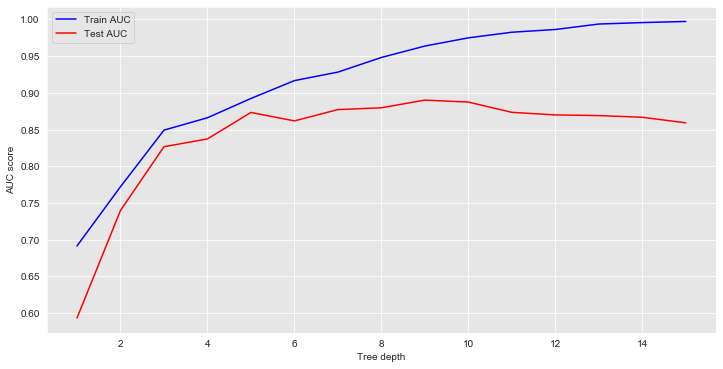

In [182]:
# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 15, 15, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=SEED)
   dt.fit(X_train_resampled, y_train_resampled)
   train_pred = dt.predict(X_train_resampled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

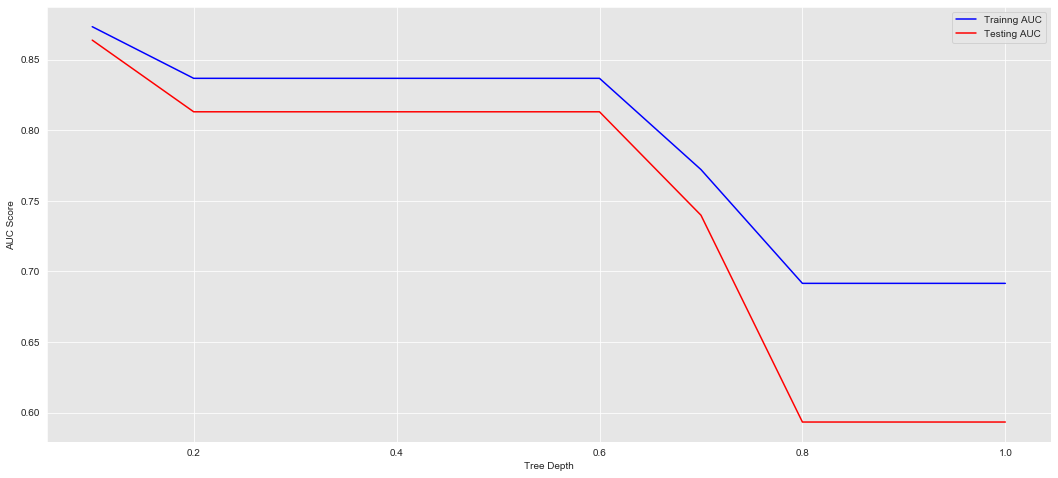

In [183]:
# Identify the optimal min-samples-split for given data
min_samples_splits = np.linspace(0.1, 1, 10)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, random_state=SEED)
    dt.fit(X_train_resampled, y_train_resampled)
    train_pred = dt.predict(X_train_resampled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(18,8))
plt.plot(min_samples_splits, train_results, color='blue', label='Trainng AUC')
plt.plot(min_samples_splits, test_results, color='red', label='Testing AUC')
plt.xlabel('Tree Depth')
plt.ylabel('AUC Score')
plt.legend()
plt.show()

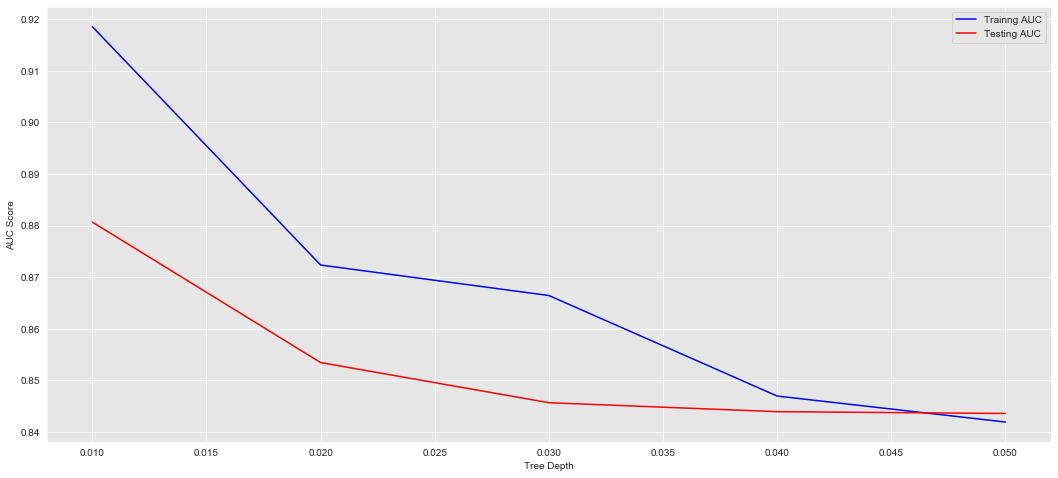

In [186]:
# Calculate the optimal value for minimum sample leafs
min_samples_leafs = np.linspace(0.01, 0.05, 5)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=SEED)
    dt.fit(X_train_resampled, y_train_resampled)
    train_pred = dt.predict(X_train_resampled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(18,8))
plt.plot(min_samples_leafs, train_results, color='blue', label='Trainng AUC')
plt.plot(min_samples_leafs, test_results, color='red', label='Testing AUC')
plt.xlabel('Tree Depth')
plt.ylabel('AUC Score')
plt.legend()
plt.show()

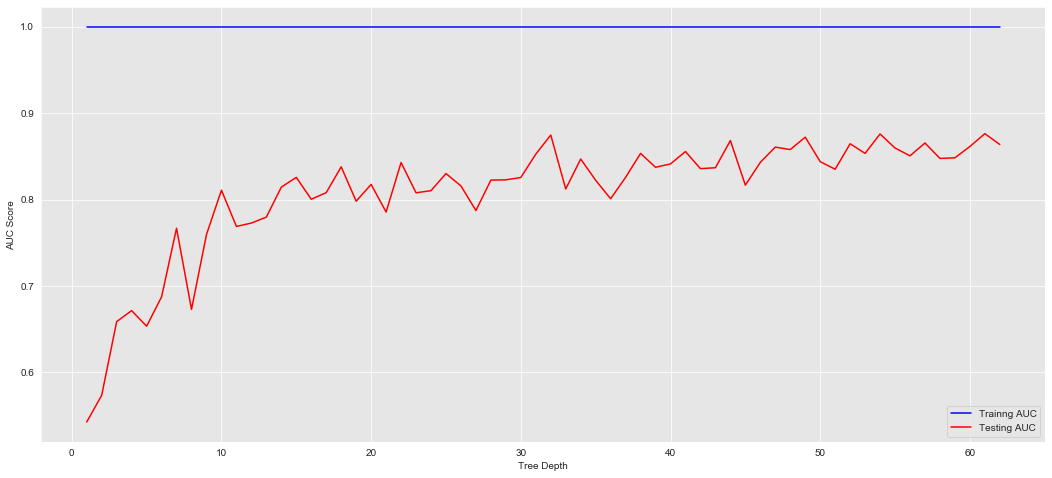

In [185]:
# Find the best value for optimal maximum feature size
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []

for max_feature in max_features:
    dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=SEED)
    dt.fit(X_train_resampled, y_train_resampled)
    train_pred = dt.predict(X_train_resampled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(18,8))
plt.plot(max_features, train_results, color='blue', label='Trainng AUC')
plt.plot(max_features, test_results, color='red', label='Testing AUC')
plt.xlabel('Tree Depth')
plt.ylabel('AUC Score')
plt.legend()
plt.show()

In [202]:
dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=32,
                           max_depth=5,
                           min_samples_split=0.2,
                           min_samples_leaf=0.047, 
                           random_state=SEED)
dt.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=32,
                       min_samples_leaf=0.047, min_samples_split=0.2,
                       random_state=1)

In [203]:
y_pred = dt.predict(X_test)

In [204]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7567785047055943

In [205]:
recall_score(y_test, y_pred)

0.6831683168316832

In [206]:
print(confusion_matrix(y_test, y_pred))

[[470  96]
 [ 32  69]]


In [210]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.83      0.88       566
         1.0       0.42      0.68      0.52       101

    accuracy                           0.81       667
   macro avg       0.68      0.76      0.70       667
weighted avg       0.86      0.81      0.83       667



In [211]:
dt.feature_importances_

array([0.        , 0.26934635, 0.        , 0.        , 0.        ,
       0.38083796, 0.        , 0.02279706, 0.        , 0.        ,
       0.05509419, 0.        , 0.27192444, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

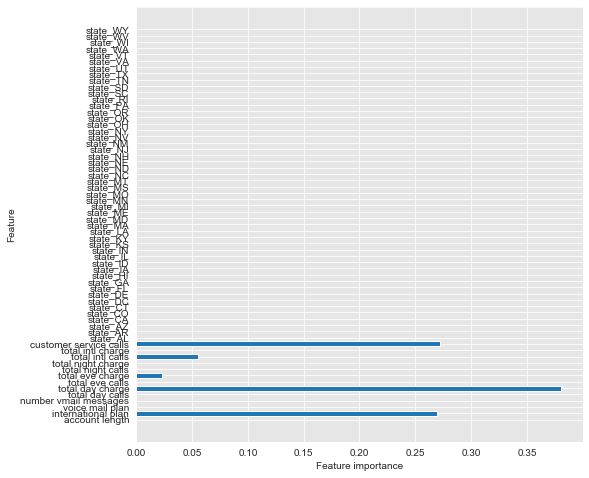

In [214]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(dt)

## Bagging

In [238]:
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20, random_state=SEED)

In [239]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20, random_state=1)

In [240]:
bagged_tree.score(X_train, y_train)

0.9624906226556639

In [241]:
bagged_tree.score(X_test, y_test)

0.9400299850074962

In [242]:
y_pred = bagged_tree.predict(X_test)

In [243]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[557   9]
 [ 31  70]]
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       566
         1.0       0.89      0.69      0.78       101

    accuracy                           0.94       667
   macro avg       0.92      0.84      0.87       667
weighted avg       0.94      0.94      0.94       667



In [244]:
#Changing to entropy
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=5), n_estimators=20, random_state=SEED)

In [245]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5),
                  n_estimators=20, random_state=1)

In [246]:
bagged_tree.score(X_train, y_train)

0.9662415603900976

In [247]:
bagged_tree.score(X_test, y_test)

0.9460269865067467

In [248]:
y_pred = bagged_tree.predict(X_test)

In [249]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[559   7]
 [ 29  72]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       566
         1.0       0.91      0.71      0.80       101

    accuracy                           0.95       667
   macro avg       0.93      0.85      0.88       667
weighted avg       0.94      0.95      0.94       667



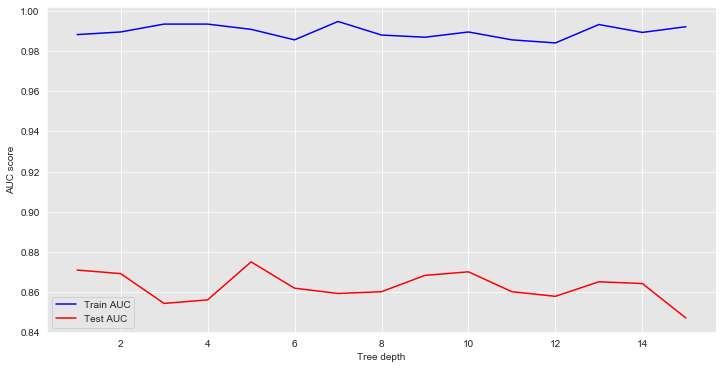

In [250]:
#Slight increase, can this be improved by adjusting max_depth?
max_depths = np.linspace(1, 15, 15, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', random_state=SEED), n_estimators=20)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

## Random Forest

In [267]:
forest = RandomForestClassifier(n_estimators=100, max_depth=5)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [268]:
forest.score(X_train, y_train)

0.8619654913728432

In [269]:
forest.score(X_test, y_test)

0.848575712143928

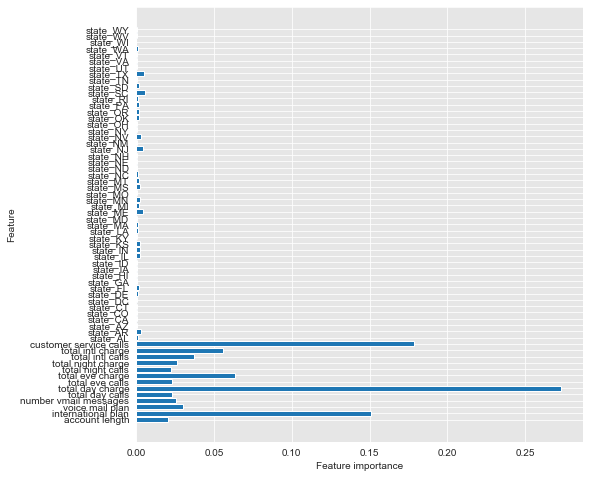

In [270]:
plot_feature_importances(forest)

In [276]:
y_pred = forest.predict(X_test)

In [277]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[566   0]
 [101   0]]
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       566
         1.0       0.00      0.00      0.00       101

    accuracy                           0.85       667
   macro avg       0.42      0.50      0.46       667
weighted avg       0.72      0.85      0.78       667



In [279]:
#Not good.  Let's try using SMOTE.
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)

In [280]:
rf1 = RandomForestClassifier()
rf1.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [281]:
y_preds_test = rf1.predict(X_test)
y_preds_train = rf1.predict(X_train_resampled)

print('Training Recall:', recall_score(y_train_resampled, y_preds_train))
print('Testing Recall:', recall_score(y_test, y_preds_test))

Training Recall: 1.0
Testing Recall: 0.7227722772277227


In [286]:
rf1.score(X_train_resampled, y_train_resampled)

1.0

In [287]:
rf1.score(X_test, y_test)

0.9355322338830585

In [288]:
y_pred = forest.predict(X_test)

In [289]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[566   0]
 [101   0]]
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       566
         1.0       0.00      0.00      0.00       101

    accuracy                           0.85       667
   macro avg       0.42      0.50      0.46       667
weighted avg       0.72      0.85      0.78       667



In [290]:
#Not too helpful, might check back with Pipeline

## Gradient Boosting and AdaBoost

In [292]:
adaboost_clf = AdaBoostClassifier(random_state=42)

In [293]:
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [294]:
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

In [295]:
print_metrics(y_train, adaboost_train_preds)

Precision Score: 0.6975806451612904
Recall Score: 0.45287958115183247
Accuracy Score: 0.8934733683420856
F1 Score: 0.5492063492063493


In [296]:
print_metrics(y_test, adaboost_test_preds)

Precision Score: 0.6538461538461539
Recall Score: 0.33663366336633666
Accuracy Score: 0.8725637181409296
F1 Score: 0.4444444444444445


In [297]:
gbt_clf = GradientBoostingClassifier(random_state=42)

In [298]:
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [299]:
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [301]:
print_metrics(y_train, gbt_clf_train_preds)

Precision Score: 0.9873417721518988
Recall Score: 0.8167539267015707
Accuracy Score: 0.9722430607651913
F1 Score: 0.8939828080229226


In [302]:
print_metrics(y_test, gbt_clf_test_preds)

Precision Score: 0.9012345679012346
Recall Score: 0.7227722772277227
Accuracy Score: 0.9460269865067467
F1 Score: 0.8021978021978022
